# Quantum Phase Measurment (Clock Synchronization)

This experiments  is based on key scientific papers, which are:

### Reading material
- Komar, Peter, et al. "A quantum network of clocks." Nature Physics 10.8 (2014): 582-587.
- Giovannetti, Vittorio, Seth Lloyd, and Lorenzo Maccone. "Quantum-enhanced positioning and clock synchronization." Nature 412.6845 (2001): 417-419.
- Bollinger, John J., et al. "Optimal frequency measurements with maximally correlated states." Physical Review A 54.6 (1996): R4649.
- Leibfried, Dietrich, et al. "Toward Heisenberg-limited spectroscopy with multiparticle entangled states." Science 304.5676 (2004): 1476-1478.
- Kimble, H. Jeff. "The quantum internet." Nature 453.7198 (2008): 1023-1030.

A clock in the most simple sense is a resonator with a well-defined frequency $\omega_0$. The process of time-keeping is nothing more then the frequent interrogation of the clocks phase $\phi$, which ticks with a rate of $\phi=\omega_0t$ and thus $t=\phi/\omega_0$. In the current SI system $\omega_0$ is defined by the frequency of the unperturbed ground-state hyperfine transition of the caesium 133 atom, which is defined to be $9,192,631,770 Hz$. A the trasition frequency is know (defined, actually), the process of time-keeping requires us to frequently interrogate the phase with the higest possible precision. Assuming that the iterrogation delay is fixed, we a timing error of $\delta t=\delta \phi / \omega_0$. This means that we have, in essence two knowbs, which we can turn, if we want to attain higher timing precision:

1. <b>Increase of the transition frequency</b>: this can be done, by e.g. moving from a Ceasium standard to an optical clock standard in, e.g., Strontium, with has a transition frequency of $4.2\cdot10^{14} Hz$ or $\approx 700 nm$. This approach is, however limited, because we simply at this point don't have really good technology good much beyond the visible spectrum.
2. <b>Decreaseing of the measurement error $\Delta\phi$ by using a large number of identical resonators (atoms) and averaging over individual phase measurements in a well-defined manner.
    
<img src="Cs-Hyperfine.png" width="75%"/>
    
In this lecture we shall focus on the latter approach and discuss, how quantum technology, can help improve the precision of phase measurements dramatically. We start by noting that the system in question is essentially a two-level system, or, in terms of Quantum Technology a QuBit. This is a very helpful observation as it allows us to draw on a set of theoretical understanding that we can exploit. The second is that we can now translate the phase measurement process on a quantum computer and do life-experiments in the classroom.
  

## Single QuBit based Quantum Phase Measurement
We first start by understaing the way phases are measured. This, of course, required interferometry, so we first have to create a superposition state, using the $\hat{H}$ operator from a computational basis state $|0\rangle$. Then we apply the phase shift using a phase gate $\hat{U}(\phi)=|0\rangle\langle0|+e^{i\phi}|1\rangle\langle1|$. Then we rotate by $\pi/2$ around the X-axis using the $\hat{RX}$-gate. Then we apply another $\hat{H}$-gate.
    
We use QISKIT to implement the interferometer operation:    

In [1]:
#This is just a few packages which we have to import first
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
import numpy as np
import matplotlib.pylab as plt
sim = Aer.get_backend('aer_simulator') 


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


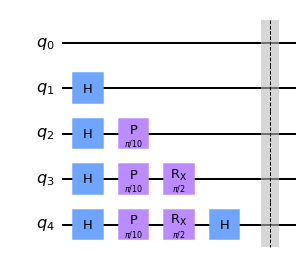

In [2]:
phi = 0.1*np.pi
qc = QuantumCircuit(5)
#the 0-qubit remains empty
#the 1-qubit: mixing with the H-gate
qc.h(1)
    
#the 2-qubit:apply phase and rotate around along the equator
qc.h(2)
qc.p(phi, 2)
    
    
#the 3-qubit:rotate around x to get onto the zeor-meridian
qc.h(3)
qc.p(phi, 3)
qc.rx(pi/2,3)
    
#the 4-qubit: attempt to unmix with second H-gate. End up on a latitude proportial to phi
qc.h(4)
qc.p(phi, 4)
qc.rx(pi/2,4)
qc.h(4)

#we want to see the statevectors
qc.save_statevector()

#draw the circuit
qc.draw()

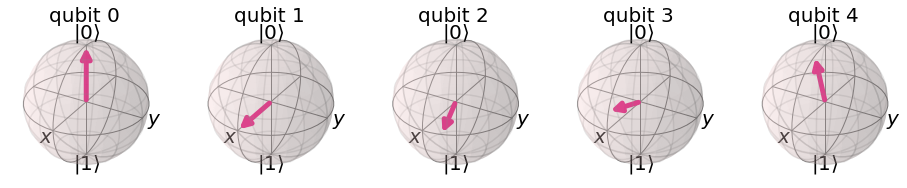

In [3]:
#draw the bloch-sphere
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result(); 
state = result.get_statevector()
plot_bloch_multivector(state)
    

Using this operation we have converted the phas $\phi$ into a measurable probability of the $|1\ket$-state, which you can see from the fact that the Block vector no longer points to the north pole. Let's do a bit of mathematics to find a quantitaive relation. The probability of measuring the Qubit in state $|0\rangle$ is $p_0=(1+\cos\phi)/2$ and in state $|1\rangle$ is $p_0=(1-\cos\phi)/2$.

We can thus extract the phase by measuring the parity $P=p_0-p_1$. The appropriate operator is given by $\hat{P}=|0\rangle\langle0|- |1\rangle\langle1|$ and the expectation value $\langle\hat{P}\rangle=\cos\phi$. It is also noteworthy that $\hat{P}^2=1$ and thus we find the variance $\Delta P^2 = \langle\hat{P}^2\rangle- \langle\hat{P}\rangle^2=\sin^2\phi$.

Experimentally we do not have access to the expectation value directly. The thing we can do is to use a (sufficiently large) sample  $N$ of identical Qubits and measure those, recording the number of time $N_0$ that the Qubit collapsed into the $|0\rangle$ state and the number of times $N_1$, where it collapsed into the $|1\rangle$ state. From this we can construct the sample mean $\bar{P}=\frac{1}{N}(N_0-N_1)$ as an unbiased estimator for the expectation value $\langle\hat{P}\rangle$. From rather general assumptions on the probability distribution we can assume the this sample mean has a variance of  $\Delta \bar{P}^2=\Delta P^2/N$. The mean error $\Delta \bar{P}$ is simply the square root of teh variance, which is $\Delta \bar{P}=\Delta P/\sqrt{N}$.

It was our task to measure $\phi$ with as little error $\Delta\phi$ as possible. Given that $\phi=\arccos{p}$ we find that the experimental error (noise level) $\Delta\bar{\phi}=\frac{1}{\sqrt{1-\bar{P}}}\Delta \bar{P}=\frac{1}{\sqrt{1-\cos{}^2\phi}}sin{}\phi\frac{1}{\sqrt{N}}=\frac{1}{\sqrt{N}}$.

This is a profound finding. It means that any measurement of the phase $\phi$ is fundamentally noisy with a fixed noise level, that scales with an inverse square with the number of QuBits that we can independently measure to fix a measurement. We need to incease the number of Qubits by 100 if we want to reduce the noise 10-fold. This also means that any clock will give a fundamental uncertainty in the timing on the order of  $1\:\mathrm{rad}$ of a complete clock cycle divided by the square root for the number of identical resonators, which work in the clock.


### Task 1: Time Averaging of Independent QuBits
1. Create a quantum circuit that measures $\bar{\phi}$ for a given value of $N$ and $\phi$. Show the circuit.
2. Run the script as a function of $\phi\in(0,\pi)$ for a given number of $N=100,400,1600$ independent QuBits. Since you know the real value of $\phi$ you can plot the error $\Delta\phi=\bar{\phi}-\phi$ for every value of $N$
3. Plot the experimental error distribution for every value of $N$
4. Show for each $N$ that your estimator is unbiased (e.g. the mean error is zero) and that its standard devation follow the relation derived above.

We start by creating a circuit for the phase/parity measurement, as presented above. The specific phase $\phi$ goes in as an input parameter

In [4]:
def phase_detection_single(phi):
    qreg_q = QuantumRegister(1, 'q')
    qc = QuantumCircuit(qreg_q)
    qc.h(qreg_q[0])
    qc.p(phi, qreg_q[0])
    qc.rx(pi/2,qreg_q[0])
    qc.h(qreg_q[0])
    qc.measure_all();
    return qc

Then we show one specific circuit for an arbitrary angle of $\phi=0.2\pi$ as an example.

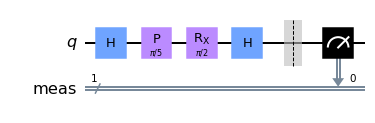

In [5]:
qc = phase_detection_single(0.2*np.pi)
qc.draw()

Now we create a script that creates and runs the quantum script for a series of $\phi$-values, ranging from $0$ to $\pi$ (everything else will give problems, due to the arccos-ambiguity and I am too lazy for this). From teh results it calculates the sample estimated parity and also the sample-estimated phase estimated. The function return the series of true phases $\phi$, the series of sample estimated $\bar{P}$ and the series of sample estimated $\bar{\phi}$. The function takes the number for $\phi$ and the number of Qubits $N$ to be measured as inputs. 

In [6]:
def phase_detection_single_experiment(num_phi, N=1024):
    sim = Aer.get_backend('aer_simulator') 
    parity = np.zeros([num_phi])
    phases = np.zeros([num_phi])
    phis = np.linspace(0,np.pi,num_phi)
    for k, phi in enumerate(phis):
        circuit = phase_detection_single(phi)  
        result = sim.run(circuit, shots=N).result(); 
        counts = result.get_counts()       
        for key, val in counts.items():
            key_ = key.replace(" ", "")
            p = int(key_,2)
            if p == 0:
                parity[k] = parity[k]+val
            else:
                parity[k] = parity[k]-val                       
                    
        parity[k] = parity[k]/N
    phis_est = np.arccos(parity);
    return phis, parity, phis_est

This function is used to plot the results. It plots three curves
1. A plot of the sample estimated $\bar{P}$ values as a function of the true phase $\phi$ with an overlay of the true expectation value $\langle\hat{P}\rangle$.
2. A plot of the phase estimation error $\bar{\phi}-\phi$  as a function of the true phase $\phi$. This should be a constant zero-centered line.
3. A histogram of all phase estimation errors $\bar{\phi}-\phi$ over (should be independent of $\phi$, thus we can use this as an unbiased sampling method for the distribution of the errors). Together with the average error (should be $0$ because the estimator $\bar{\phi}$ is unbiased and with a standard deviation, which should be $\frac{1}{\sqrt{N}}$ as per the disussion above.

The function takes the result from phase_detection_single_experiment() as an input and return the list of phase estimation errors $\bar{\phi}-\phi$ as well as this lists mean and this lists standard devation (as displayed in the histogram).

In [7]:
def phase_detection_single_experiment_plot(phis, parity, phis_est, N):
    err = phis_est-phis
    meanerr = np.sum(err)/num_phi
    stddeverr = np.sqrt(np.sum((err-meanerr)**2)/(num_phi-1))

    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.plot(phis, parity,'bo')
    plt.plot(phis, np.cos(phis),'b')
    plt.title('N=' + str(N))
    plt.xlabel('Phase $\phi$ [rad]')
    plt.ylabel('Parity')
    plt.xlim(0, np.pi)
    plt.grid(which='major',axis='both')

    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.plot(phis, err,'bo')
    plt.title('N=' + str(N))
    plt.xlabel('Phase $\phi$ [rad]')
    plt.ylabel('Phase Measurement Error')
    plt.xlim(0, np.pi)
    plt.grid(which='major',axis='both')



    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.hist(err)
    plt.title('$N$=' + str(N) + ' MeanErr=' + f"{meanerr:{4}.{2}}" + ' StdDevErr=' + f"{stddeverr:{4}.{2}}")
    plt.xlabel('Phase Measurement Error')
    plt.ylabel('No. of Occurences')
    plt.grid(which='major',axis='both')

    return err, meanerr, stddeverr

Now we run the experiment with $N=100,400,1600$ as stated above

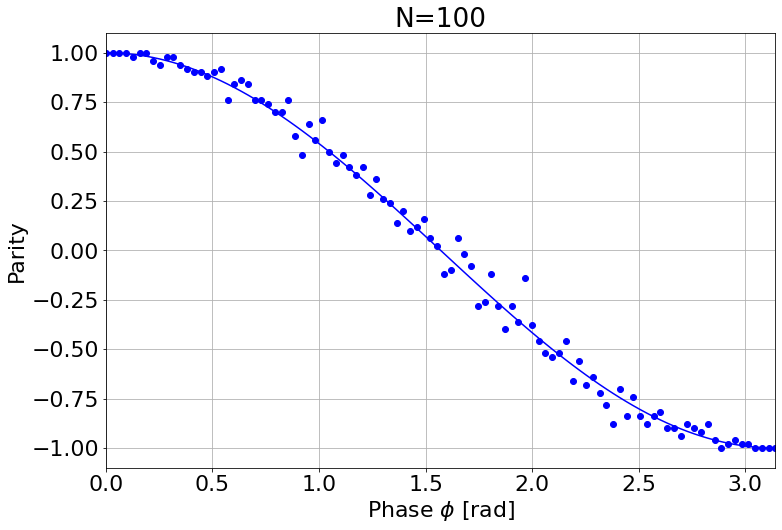

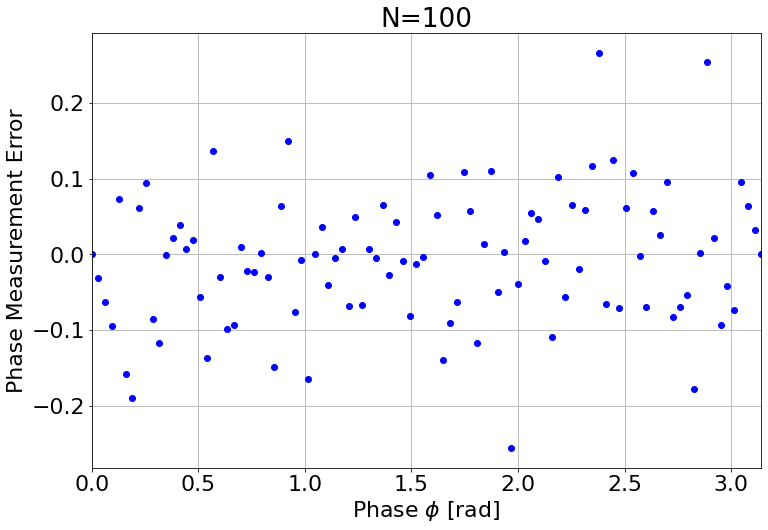

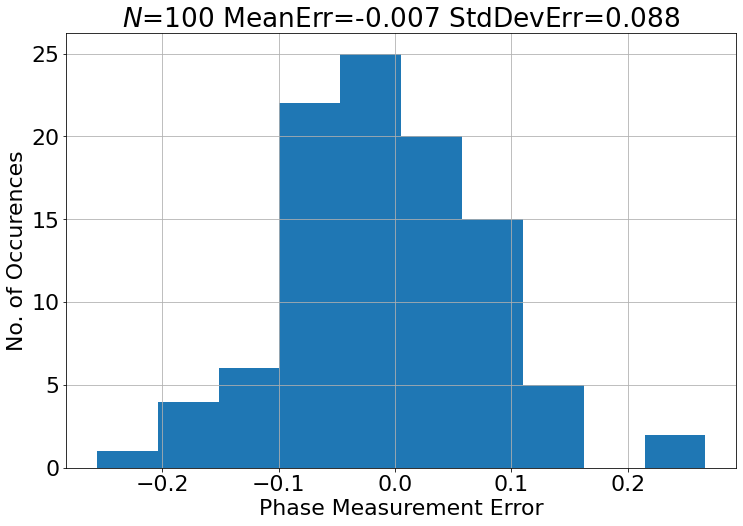

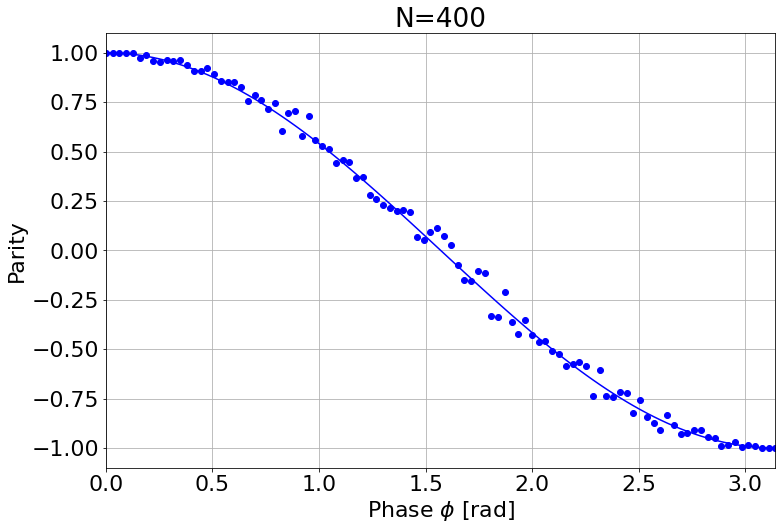

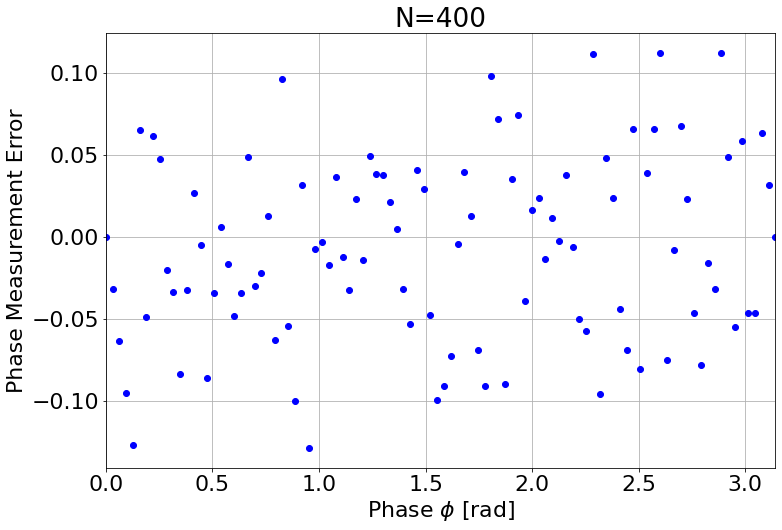

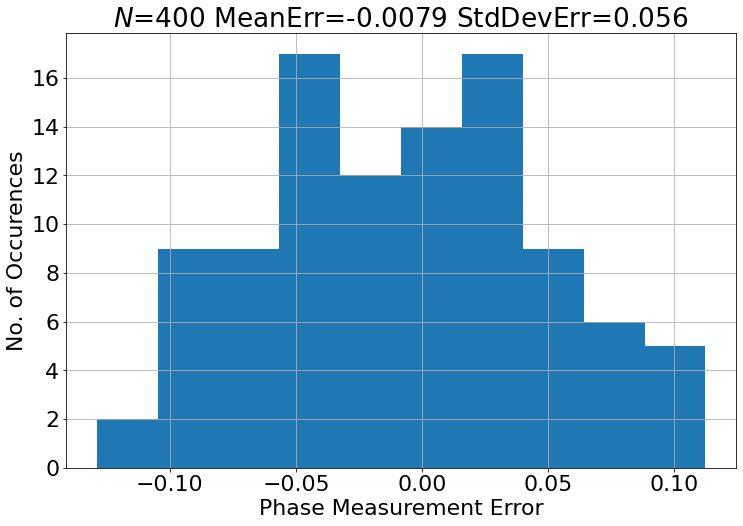

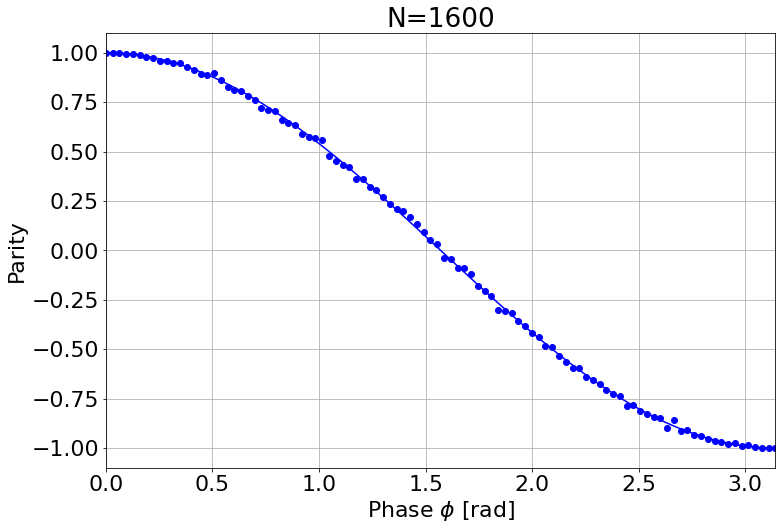

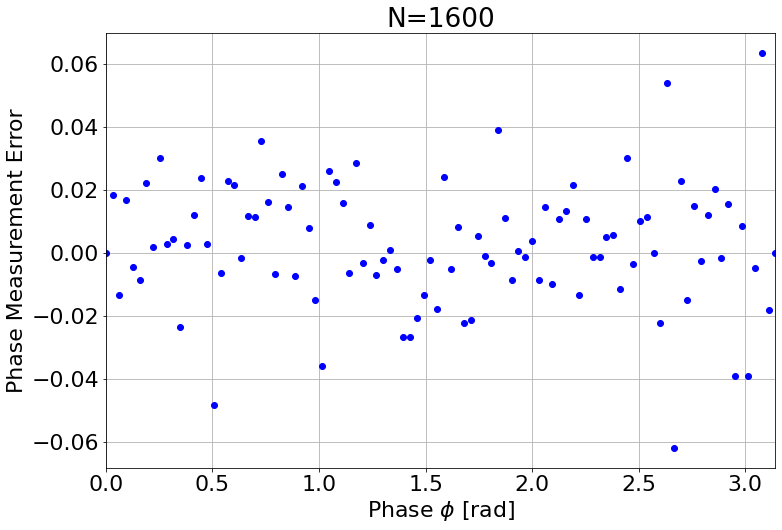

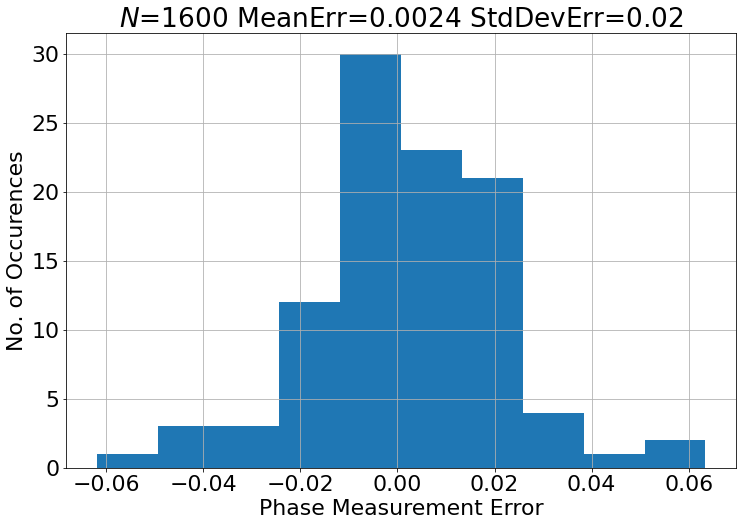

In [8]:
num_phi = 100
N = 100
phis, parity, phis_est = phase_detection_single_experiment(num_phi, N)
err, meanerr, stddeverr = phase_detection_single_experiment_plot(phis, parity, phis_est, N)

N = 400
phis, parity, phis_est = phase_detection_single_experiment(num_phi, N)
err, meanerr, stddeverr = phase_detection_single_experiment_plot(phis, parity, phis_est, N)

N = 1600
phis, parity, phis_est = phase_detection_single_experiment(num_phi, N)
err, meanerr, stddeverr = phase_detection_single_experiment_plot(phis, parity, phis_est, N)


The bevahior is just as expected
- the sample estimated partity $\bar{P}$ follows the line predicted by the expectation values $\langle\hat{P}\rangle$, albei with noise
- the phase measurement error is not biased, which means that the sample phase estimator $\bar\phi$ is a good measurement for the true phase $\phi$.
- However the estimator is noisy, with a constant niose level for all values of $\phi$, as expected
- The noise level drops very close to the expected rate of $\frac{1}{\sqrt{N}}$ with $0.1$ at $N=100$, $0.058$ at $N=400$ and $0.027$ at $N=1600$.
The mean is always much lower than the standard deviation which underlines the unbiasedness (values may change slight from run to run).

## Optimal Quantum Phase Measurement using Entanglement
So far the results may have been interesting from a technical point of few but, I suppose, they hold no general surprise. There is an error in phase measurement and that error scales with $N^{-1/2}$ with the number of identical systems, you can average over. However, from a fundamental point of view this is not the optimal measurement, particuarliy wrt. the scaling behaviour. To access the true limit for the measuremet of the phase, we have to utilize entanglement as a resource for mesurement. As such we split the $N$ identical photons in $M$ groups of $n$ QuBits each, such that we use the same total number of QuBits $N=M\cdot{}n$. We then entangle the $n$ QuBits into an $n$-QuBit GHZ-state $|\psi\rangle=\frac{1}{\sqrt{2}}(|0_00_1...0_{n-1}\rangle+|1_01_1...1_{n-1}\rangle)$. Think of the GHZ state as the $n$-paricle generalization of a Bell State $\Phi^+=\frac{1}{\sqrt{2}}(|0_00_1\rangle+|1_01_1\rangle)$

GHZ-states are generated by applying a $\hat{H}$ onto QuBit $q_0$ and then a series of $n-1$ CNOT opererations, with $q_0$ beging the control and $q_1...q_n$ begin the target QuBits. An example for $n=4$ is given below:

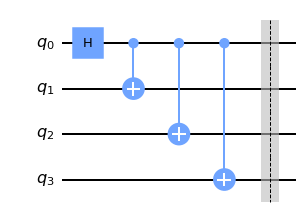

In [9]:
qc = QuantumCircuit(4)
#the 0-qubit apply hadamard gate
qc.h(0)
#the 1-qubit: CNOT with q0 as the control
qc.cx(0,1)
#the 2-qubit: CNOT with q0 as the control
qc.cx(0,2)
#the 3-qubit: CNOT with q0 as the control
qc.cx(0,3)

#we want to see the statevectors
qc.save_statevector()

#draw the circuit
qc.draw()

We can visualize the output by calculating the state vector and plotting it directly, and we see that we get the appropriate 4-QuBIt GHZ-state.

In [10]:
#draw the bloch-sphere
result = sim.run(qc).result(); 
state = result.get_statevector()
state.draw(output='latex')

<IPython.core.display.Latex object>

With a bit of a trained eye you can now already see the ingeneious part. Any phase that is imprinted onto any of the QuBits shows in the general phase of all other QuBits. If we assume the QuBits to each be an identical clock resonators, we can assume that each individual QuBit will aquire a phase $\phi$ and the GHZ-state will aquire a total phase of $n\phi$.

We just have to extract the total phase from the entangled QuBits. This works just like in the general case. An $\hat{RX}$-gate and then an $\hat{H}$ gate is applied to each of the QuBits and then we have to measure the $n$-QuBit generalization parity $\langle\hat{P}_n\rangle$. The $n$-QuBit parity adds the probabilities of a specific measurement outcome and weighs it by the number of $|1\rangle$-states that the measurement collapsed into. The weighing is $+1$ if the number of $|1\rangle$-states is even and the weight is $-1$ is the number is odd. One can show that we now get a measurement result of $\langle\hat{P}_n\rangle=\cos{n\phi}$ with exactly the same uncertainty $\Delta P_n = \langle\hat{P_n}^2\rangle- \langle\hat{P_n}\rangle^2=\sin^2\phi$. Note that the measurementresult has scale, whereas the uncertaty has remained constant.

We can now average over $M$ ensembles an obtain an unbiased estimator $\bar{P_n}$ for $\langle\hat{P}_n\rangle$ and the exact same discussion for the sample error applies here. The important part here, and I repeat myself, is that the estimator $\bar{P_n}$ can be used to estimate $n\phi$ which has repercussions for the sample  phase error. The phase estimator is now $\bar{\phi}=\arccos{\bar{P_n}}/n$ and the respective standard deviation (noise level) is $\Delta\bar{\phi}=\frac{1}{n\sqrt{M}}=\frac{1}{\sqrt{nN}}$. This result is profound, as we get an increase in the measurement precision determined by $\frac{1}{\sqrt{n}}$ over the classical averaging procedure. One can actually show that for $M=1$, e.g. if we can entangle all QuBits this is an optimal measurement, e.g. that it is the most precisise measurement of a phase $\phi$ that from $n$ identical copies of a QuBits that is possible given the laws of Quantum Physics (Holevo-Bound).

The repercussion for clock synchronoization are obvious: as discussed above, time measurement is equivalent to phase measurement in ensembles of identical Quanutm Resonators (typically atoms). <b>If we move from incoherent ensembles of resonators for entangled ensembles of resonators we can gain a factor of $\frac{1}{\sqrt{n}}$ in timing precision</b>. Moreover, using the lessons learned in the last lecture, we have seen that we can use the tools of Quantum Communication to distribute entanglement with very precise timing over remote locations using entanglement swapping. Using this concept we could entangle the (already entangled) ensembles of reference clocks. If we assume there are $n'$ of such reference clocks operated by various agencies connected to a worldwide Quantum Network. <b>If there are $n'$ such sites, we would stand to gain another factor of $\frac{1}{n'}$ in timing precision</b> as opposed to $\frac{1}{\sqrt{n'}}$, if we average over their respective clock signals in a classical manner. Both measures combined could easily shave off another 3 orders of magnitude from the relative walkoff of reference clocks and we could well aim for a world quantum network clock with a timing precision of far better than $10^{-20}$.

### Task 2: Time Averaging of Entangled QuBits
1. Create a quantum circuit that measures $\bar{\phi}$ optimally for a given value of $M$ and $\phi$ using $n$ QuBits in an entangled GHZ state, as discssed above. Show the circuit.
2. Run the script as a function of $\phi\in(0,\pi/n)$ for a given number of $N=1600$ and $n=2,4,8$ (hence $M=800,400,200$) QuBits. Since you know the real value of $\phi$ you can plot the error $\Delta\phi=\bar{\phi}-\phi$ for every value of $n$.
3. Plot the experimental error distribution for every value of $n$ (e.g. histogram).
4. Show for each $N$ that your estimator is unbiased (e.g. the mean error is zero) and that its standard devation follows the relation derived above.
5. Compare you result with the above obtained noise values for the $N=1600$ independent QuBits. Is the scaling as expected?

We start by creating a circuit for the phase/parity measurement, as presented above. The specific phase $\phi$ an the number of QuBits $n$ to be entangled goes in as an input parameter

In [2]:
def phase_detection_entangled(phi, n):
    qreg_q = QuantumRegister(n, 'q')
    qc = QuantumCircuit(qreg_q)
    qc.h(qreg_q[0])
    for k in range(1,n):
        qc.cx(qreg_q[0], qreg_q[k])
    for k in range(n):
        qc.p(phi, qreg_q[k])
        qc.rx(pi/2, qreg_q[k])
        qc.h(qreg_q[k])
    qc.measure_all();
    return qc

Then we show one specific circuit for an arbitrary angle of $\phi=0.2\pi$ wit $n=4$ entangled QuBits as an example.

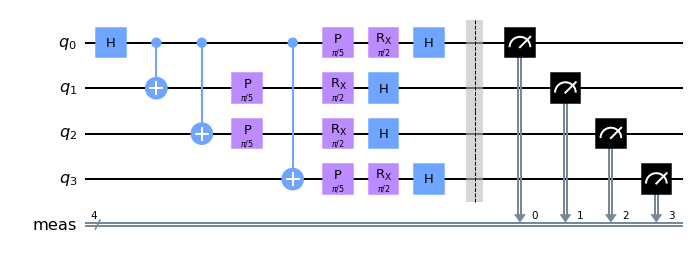

In [12]:
qc = phase_detection_entangled(0.2*np.pi,4)
qc.draw()

Now we create a script that creates and runs the quantum script for a series of $\phi$-values, ranging from $0$ to $\pi/n$ (everything else will give problems, due to the arccos-ambiguity and I am too lazy for this). From th results it calculates the sample estimated parity $\bar{P_n}$ and also the sample-estimated phase estimate. The function return the series of true phases $\phi$, the series of sample estimated $\bar{P_n}$ and the series of sample estimated $\bar{\phi}$. The function takes the number for $\phi$ and the number of Qubits $N$ to be measured and the number of QuBits to entangle $n$ as inputs. The sample depth $M$ is calculated as $M=N/n$.

In [3]:
def phase_detection_entangled_experiment(num_phi, N=1024, n=2):
    sim = Aer.get_backend('aer_simulator') 
    M = N/n;
    parity = np.zeros([num_phi])
    phases = np.zeros([num_phi])
    phis = np.linspace(0,np.pi/n,num_phi)
    for k, phi in enumerate(phis):
        circuit = phase_detection_entangled(phi,n)  
        result = sim.run(circuit, shots=M).result(); 
        counts = result.get_counts()
        for key, val in counts.items():
            p = 0
            key_ = key.replace(" ", "")
            for letter in key_:
                p = p + int(letter,2)
            if (p % 2) == 0:
                parity[k] = parity[k] + val
            else:
                parity[k] = parity[k] - val
        parity[k] = parity[k]/M
    phis_est = np.arccos(parity)/n;
    return phis, parity, phis_est

This function is used to plot the results. It plots three curves
1. A plot of the sample estimated $\bar{P_n}$ values as a function of the true phase $\phi$ with an overlay of the true expectation value $\langle\hat{P_n}\rangle$.
2. A plot of the phase estimation error $\bar{\phi}-\phi$  as a function of the true phase $\phi$. This should be a constant zero-centered noisy line.
3. A histogram of all phase estimation errors $\bar{\phi}-\phi$ over (should be independent of $\phi$, thus we can use this as an unbiased sampling method for the distribution of the errors). Together with the average error (should be $0$ because the estimator $\bar{\phi}$ is unbiased) and with a standard deviation, which should be $\frac{1}{\sqrt{nN}}$ as per the disussion above.

The function takes the result from phase_detection_entangled_experiment() as an input and returns the list of phase estimation errors $\bar{\phi}-\phi$ as well as this lists mean and this lists standard devation (as displayed in the histogram).

In [50]:
def phase_detection_entangled_experiment_plot(phis, parity, phis_est, N, n):
    
    notnan = np.argwhere(np.isnan(phis_est)==False)
    phis = phis[notnan]
    parity = parity[notnan]
    phis_est = phis_est[notnan]
    err = phis_est-phis
    meanerr = np.sum(err)/num_phi
    stddeverr = np.sqrt(np.sum((err-meanerr)**2)/(num_phi-1))

    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.plot(phis, parity,'bo')
    plt.plot(phis, np.cos(n*phis),'b')
    plt.title('N=' + str(N) + " n=" + str(n))
    plt.xlabel('Phase $\phi$ [rad]')
    plt.ylabel('Parity')
    plt.xlim(0, np.pi/n)
    plt.grid(which='major',axis='both')

    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.plot(phis, err,'bo')
    plt.title('N=' + str(N) + " n=" + str(n))
    plt.xlabel('Phase $\phi$ [rad]')
    plt.ylabel('Phase Measurement Error')
    plt.xlim(0, np.pi/n)
    plt.grid(which='major',axis='both')



    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.hist(err)
    plt.title('$N$=' + str(N) + " n=" + str(n) + ' MeanErr=' + f"{meanerr:{4}.{2}}" + ' StdDevErr=' + f"{stddeverr:{4}.{2}}")
    plt.xlabel('Phase Measurement Error')
    plt.ylabel('No. of Occurences')
    plt.grid(which='major',axis='both')

    return err, meanerr, stddeverr

Now we run the experiment with a constant number of QuBits of $N=1600$ which we group into $n=2,4,8$ entanglement groups.

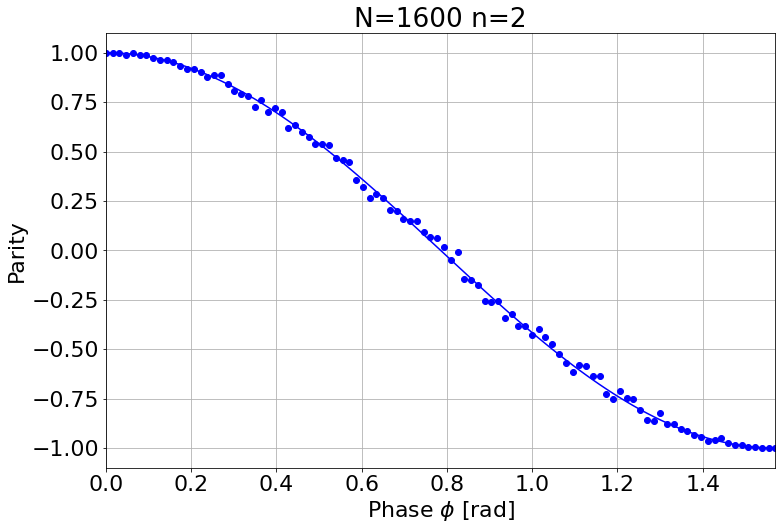

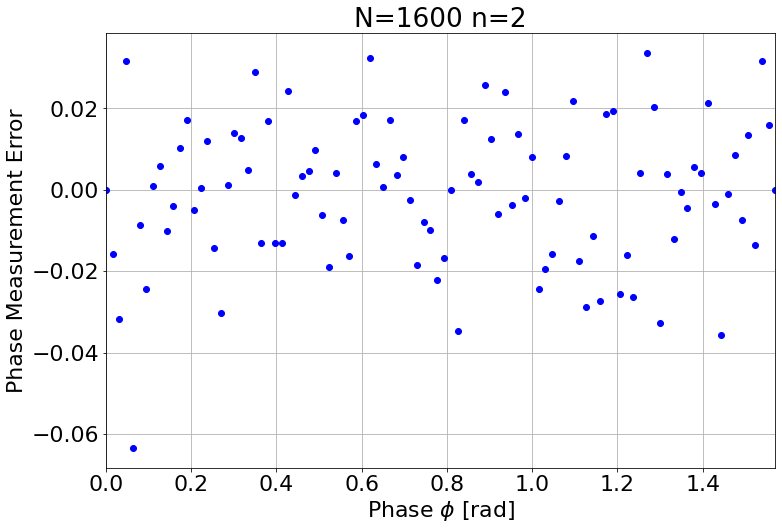

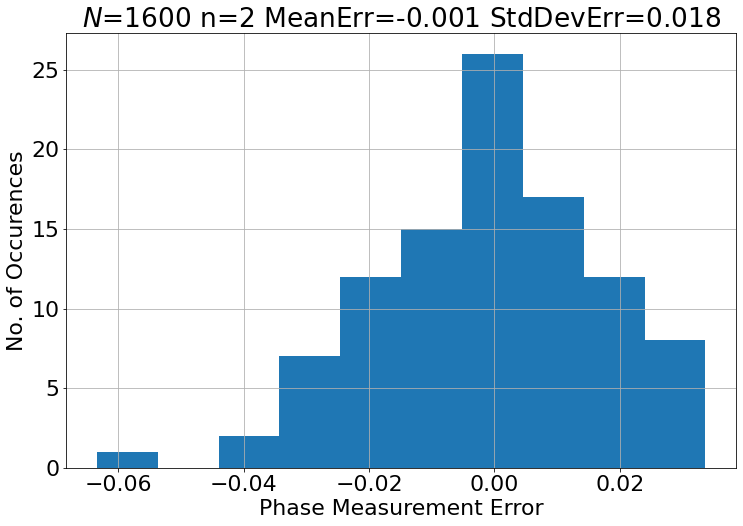

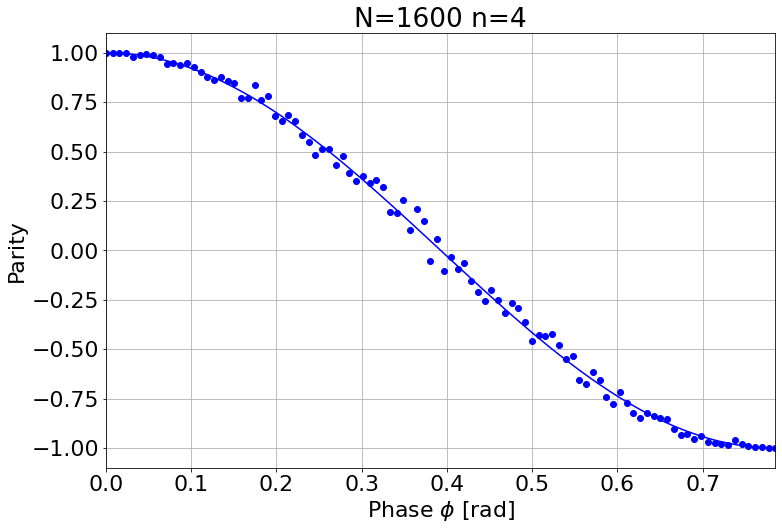

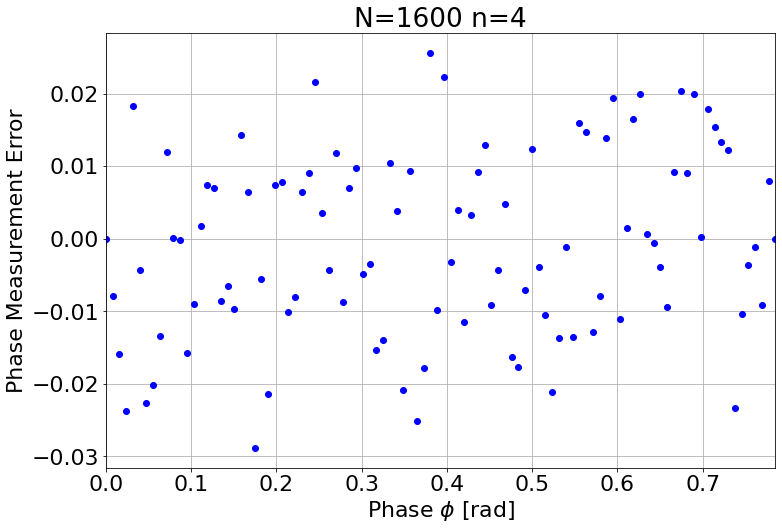

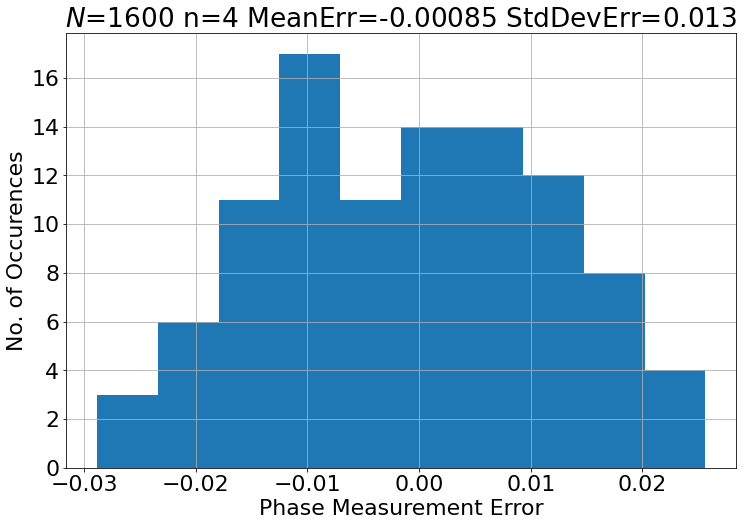

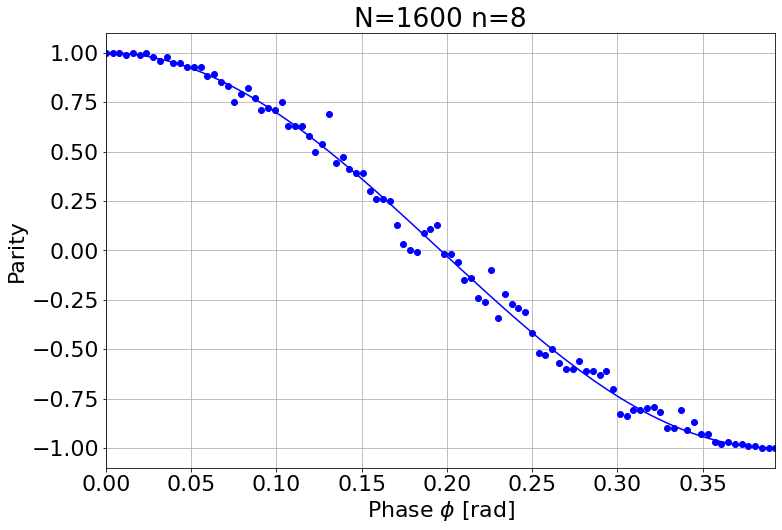

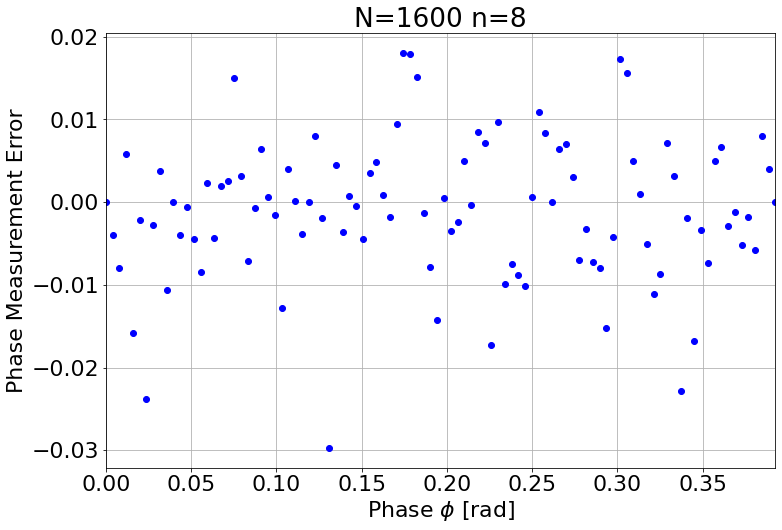

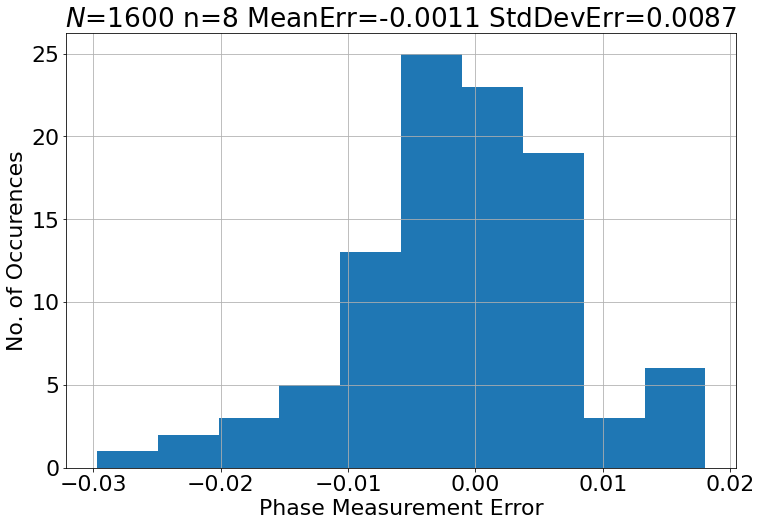

In [15]:
num_phi = 100
N = 1600
n = 2
phis, parity, phis_est = phase_detection_entangled_experiment(num_phi, N, n)
err, meanerr, stddeverr = phase_detection_entangled_experiment_plot(phis, parity, phis_est, N, n)

n = 4
phis, parity, phis_est = phase_detection_entangled_experiment(num_phi, N, n)
err, meanerr, stddeverr = phase_detection_entangled_experiment_plot(phis, parity, phis_est, N, n)

n = 8
phis, parity, phis_est = phase_detection_entangled_experiment(num_phi, N, n)
err, meanerr, stddeverr = phase_detection_entangled_experiment_plot(phis, parity, phis_est, N, n)

The bevahior is just as expected
- the sample estimated partity $\bar{P_n}$ follows the line predicted by the expectation values $\langle\hat{P_n}\rangle$, albeit with noise
- the phase measurement error is not biased, which means that the sample phase estimator $\bar\phi$ is a good measurement for the true phase $\phi$.
- However the estimator is noisy, with a constant niose level for all values of $\phi$, as expected.
- The noise level drops very close to the expected rate of $\frac{1}{\sqrt{nN}}$ with $0.019$ at $n=2$, $0.013$ at $n=4$ and $0.009$ at $N=8$. From above we had the value $0.027$ at $n=1$. all values for $N=1600$.
The mean is always much lower than the standard deviation which underlines the unbiasedness. (values may change slight from run to run).

## Addon Task: Carry out the Analysis on a Quantum Computer

We first have to load a few more tools from QISKIT. Among them is my personal acces to the IBM-cloud using an FhG-ticket. Thank you Fraunhofer-Gesellschaft! You can just go with load_account(), this is only limit you access to a few special small scale QCs. Does not really make a difference for this test.

In [5]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-fraunhofer', group='fhg-all', project='ticket')


This is essentialls the same code from above split into two different sections, the reason is simple
- QC-jobs go into a queue. Hence it makes sense to pack a set of circuits (in this case all circuits for a $\phi$-sweep into a job.
- The Queue can be very long. There is not point in waiting in the program. We will rather craete the job, queue it and then retrieve it from its job-ID for analysis
- it makes sense to transpile the jobs (e.g. convert them onto suitable operations best supported by the respective machine.
- one more caveat: jobs may be "private", this means that the results will be deleted after the first call to results()

After some initial test-runs we also implemented a calibration (error mititgation) section. After all be a using an analog device, which must be calibrated (this is done frequently but not job-specifically). To really work well this will be done for a set of selected well-defined $\phi_{calib}$-values and use them to calibrate the script. We'll see the effect later on. The set of job will then begin with parity measurements for these values which will be run with the same circuit but with $M\cdot{}r_{calib}$ repetitions, e.g. with a larger number of classical repetitions to get the noise for this calibration run low. The resulting data will the be fitted with a 2nd degree poynomial and removed from the partity data. (Default values: 10 $\phi_{calib}$ and $r_{calib}=16$).

We have also implemented another plotting function to give us some info on the calibration run.

There are a few things which we did not implement so far
- Operation on the best QUBIT. Not all QuBits run equally well. Not all QuBits are physically interconnected. Some of this may be taken care for by the transpiler. If you want to make sure, you can get error data from the devices (also from the dashboard)


In [23]:
def phase_detection_entangled_experiment_onQC_run(num_phi, provider, N=1024, n=2, deviceName=None, num_phi_calibrate=10, rep_calibrate=16):
    if (deviceName is None):
        device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                           not x.configuration().simulator and x.status().operational==True))    
    else:
        device = provider.get_backend(deviceName)
    print("Running on device: " + str(device))
    M = int(N/n)
    qcs = []
    phis_calibrate = np.linspace(0,np.pi/n,num_phi_calibrate)
    for k, phi in enumerate(phis_calibrate):
        qc = phase_detection_entangled(phi,n)  
        qc_transpiled = transpile(qc, device, optimization_level=3)
        for k_ in range(rep_calibrate):
            qcs.append(qc_transpiled)        

    phis = np.linspace(0,np.pi/n,num_phi)
    for k, phi in enumerate(phis):
        qc = phase_detection_entangled(phi,n)  
        qc_transpiled = transpile(qc, device, optimization_level=3)
        qcs.append(qc_transpiled)
    
    job = device.run(qcs, shots=M); 
    return job;
    
    
def phase_detection_entangled_experiment_onQC_analyse(num_phi, job, N=1024, n=2, deviceName=None, num_phi_calibrate=10, rep_calibrate=16): 
    M = int(N/n)
    parity = np.zeros([num_phi])
    parity_calib = np.zeros([num_phi_calibrate]);
    phases = np.zeros([num_phi])  
    result = job.result()

    phis_calibrate = np.linspace(0,np.pi/n,num_phi_calibrate)
    for k, phi in enumerate(phis_calibrate):
        for k_ in range(rep_calibrate):
            counts = result.get_counts(k*rep_calibrate+k_)
            for key, val in counts.items():
                p = 0
                key_ = key.replace(" ", "")
                for letter in key_:
                    p = p + int(letter,2)
                if (p % 2) == 0:
                    parity_calib[k] = parity_calib[k] + val
                else:
                    parity_calib[k] = parity_calib[k] - val
        parity_calib[k] = parity_calib[k]/M/rep_calibrate
    calib_fit = np.polyfit(phis_calibrate,parity_calib-np.cos(n*phis_calibrate), 2)
    calib_fit = np.poly1d(calib_fit)
                
    phis = np.linspace(0,np.pi/n,num_phi)
    for k, phi in enumerate(phis):
        counts = result.get_counts(k+num_phi_calibrate*rep_calibrate)
        for key, val in counts.items():
            p = 0
            key_ = key.replace(" ", "")
            for letter in key_:
                p = p + int(letter,2)
            if (p % 2) == 0:
                parity[k] = parity[k] + val
            else:
                parity[k] = parity[k] - val
        parity[k] = parity[k]/M

    parity_corrected = parity-calib_fit(phis);
    phis_est = np.arccos(parity_corrected)/n;
    
    return phis, parity, phis_calibrate, parity_calib, calib_fit, parity_corrected, phis_est

def phase_detection_entangled_experiment_plot_calib(phis_calibrate, parity_calib, phis, parity, calib_fit, parity_corrected, N, n):

    plt.figure(figsize=(12,8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.plot(phis, parity,'go')
    plt.plot(phis_calibrate, parity_calib,'ro')
    plt.plot(phis, np.cos(n*phis),'b')
    plt.plot(phis, parity_corrected,'bo')
    plt.title('N=' + str(N) + " n=" + str(n))
    plt.xlabel('Phase $\phi$ (Calibration Run) [rad]')
    plt.ylabel('Parity Error and Fit')
    plt.xlim(0, np.pi/n)
    plt.grid(which='major',axis='both')

Here we define important parameters. Most specifically I will only use N=400, such that we really have a chance of seeing the entanglement-enhancement. We'll use the 'ibmq_montreal', which is one of the fancy new large number of QuBit machines.

In [8]:
num_phi = 50
N = 400
deviceName = 'ibmq_montreal'
#deviceName = None

Now we run the jobs with $n=1,2,4$. Keep in mind that at this point we are just putting the jobs in the queue and printing out the job_ids, such that we can retrieve the results later. This is a bit non-elegant, since we have to manually copy&paste the job-ids in the next script line. I'll eventually think of a smarter solution (e.g. writing those to a file or something).

In [35]:
n = 1
job1 = phase_detection_entangled_experiment_onQC_run(num_phi, provider, N, n, deviceName)
print(job1.job_id())

n = 2
job2 = phase_detection_entangled_experiment_onQC_run(num_phi, provider, N, n, deviceName)
print(job2.job_id())

n = 4
job3 = phase_detection_entangled_experiment_onQC_run(num_phi, provider, N, n, deviceName)
print(job3.job_id())

Running on device: ibmq_montreal
628247c40f68653e2e228304
Running on device: ibmq_montreal
628247c70f68653b29228305
Running on device: ibmq_montreal
628247cb07c9cce28fc22844


After waiting for the jobs to complete we run the next line for the analysis. This produces the same data as for the simulated scripts from above. We have however, added a plot that displays the parity claibration (error mitigation) and display the final result in terms of the ERROR corrected results. The new plot shows the raw parity data as green dots. The red dots are the data points which are used for calibration and blue dots are the corrected partity data using a quadratic fit to the difference of the red dots and the blue line. It should lie very close to the blue curve, which is the real expectaton value of the parity.

All jobs run on ibmq_montreal


/tmp/ipykernel_59/1744250704.py:66: RuntimeWarning: invalid value encountered in arccos
  phis_est = np.arccos(parity_corrected)/n;
/tmp/ipykernel_59/1744250704.py:66: RuntimeWarning: invalid value encountered in arccos
  phis_est = np.arccos(parity_corrected)/n;


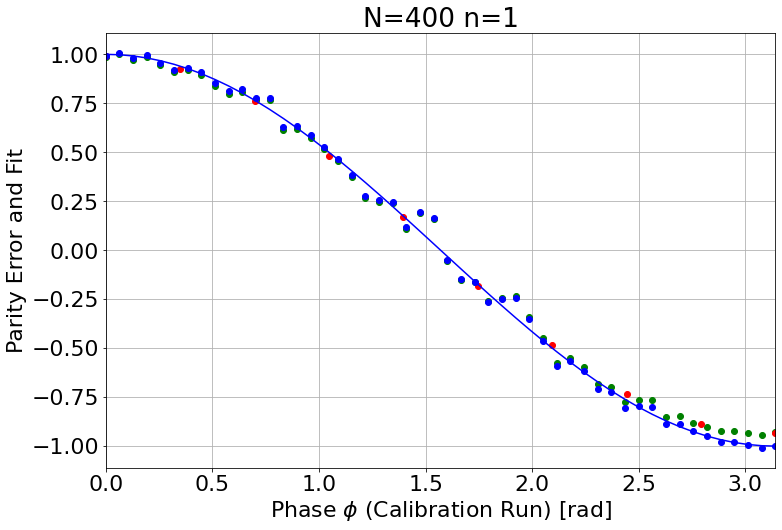

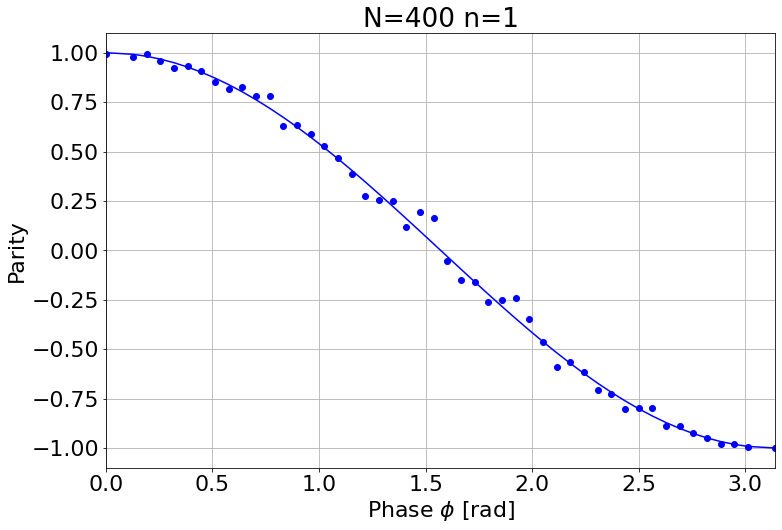

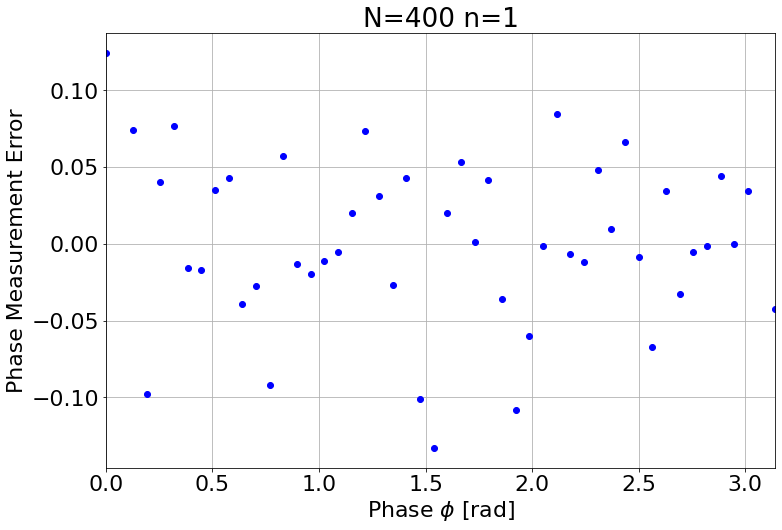

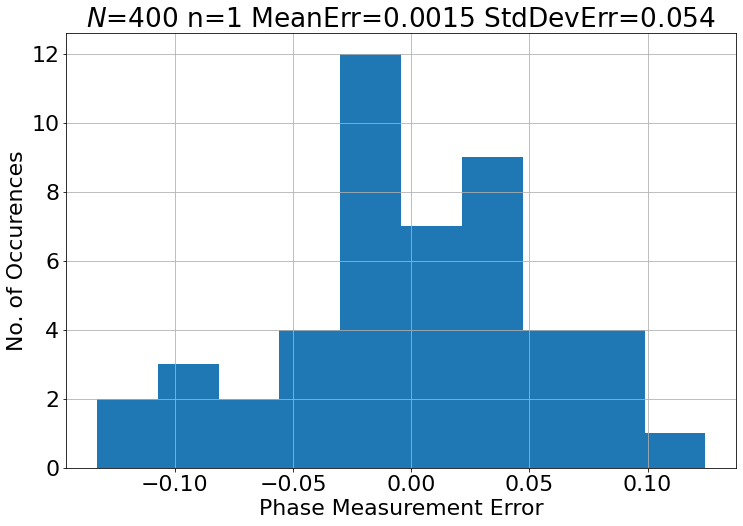

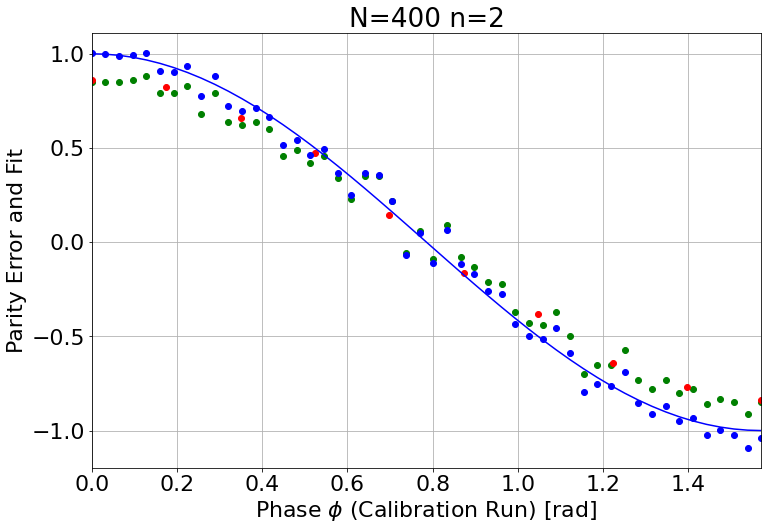

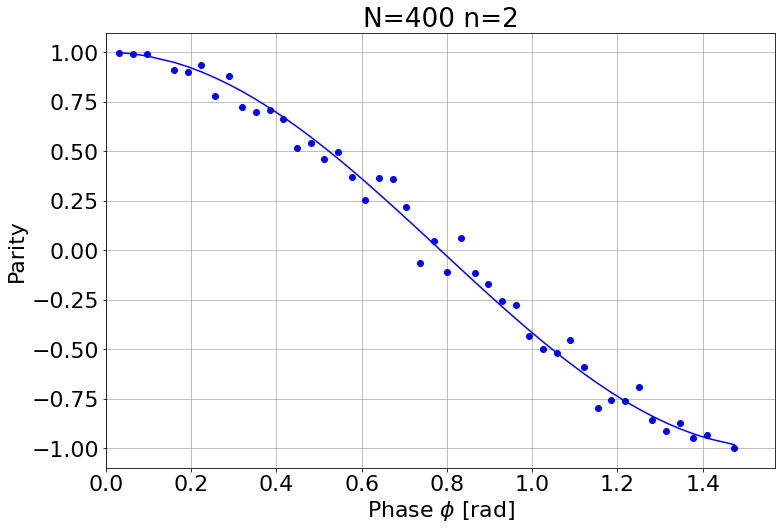

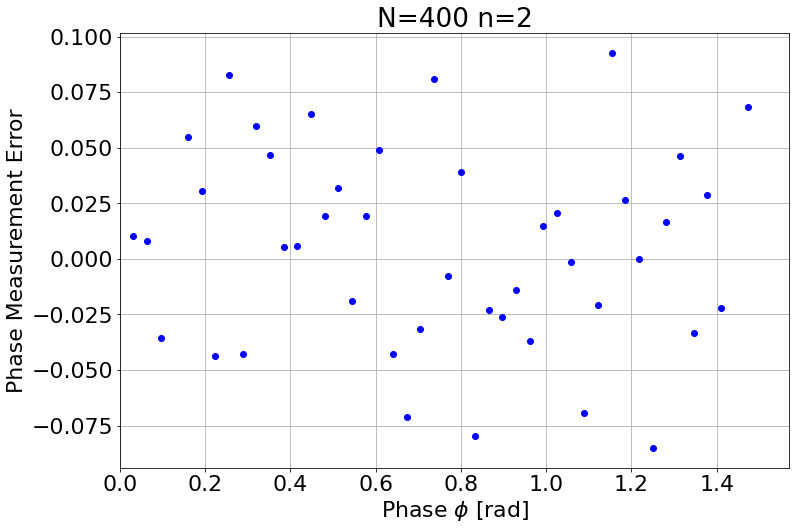

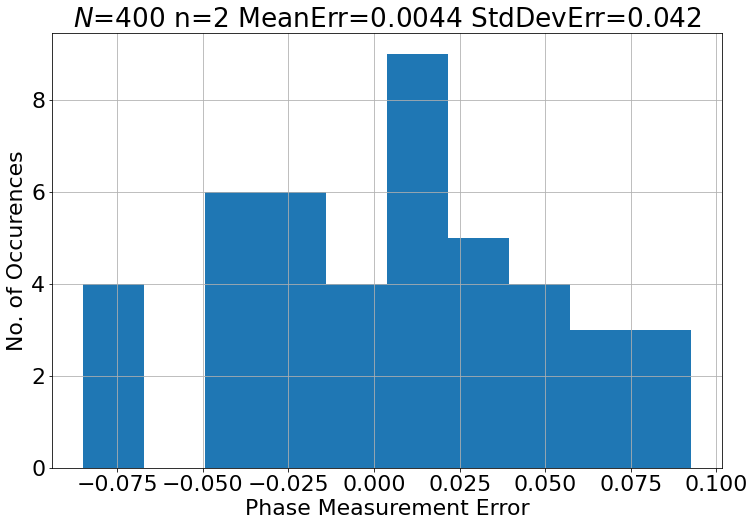

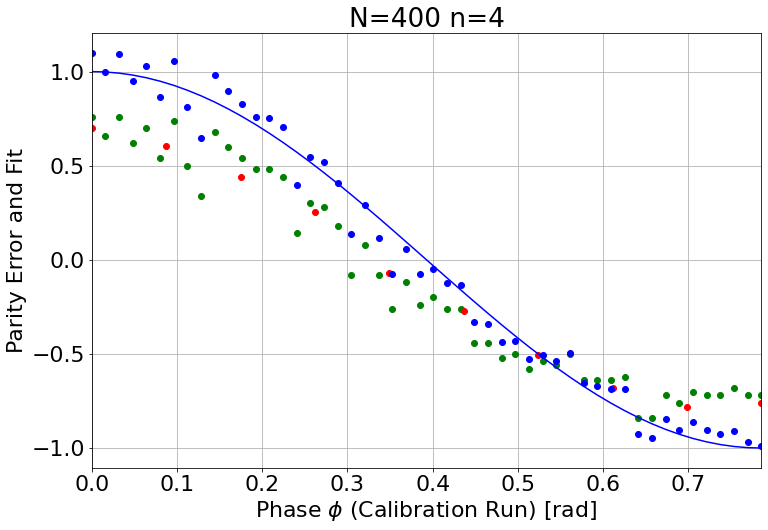

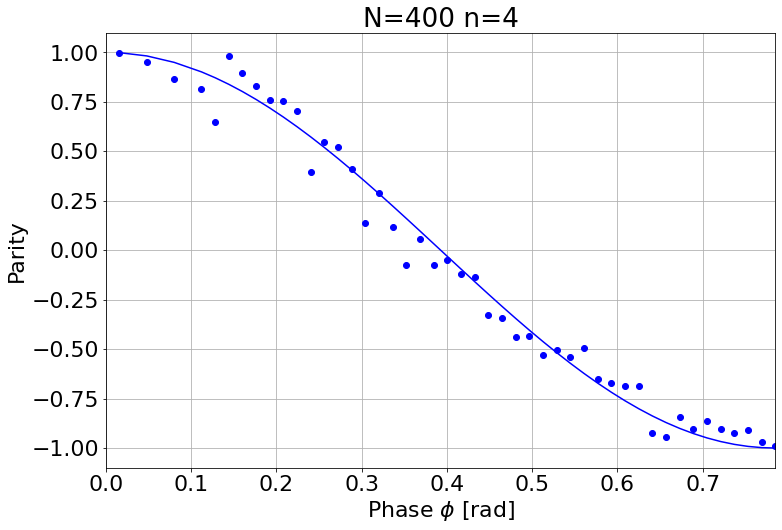

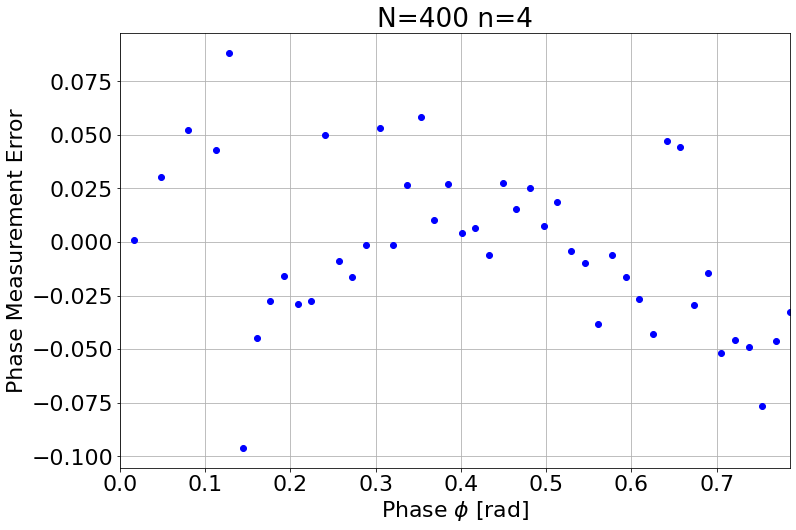

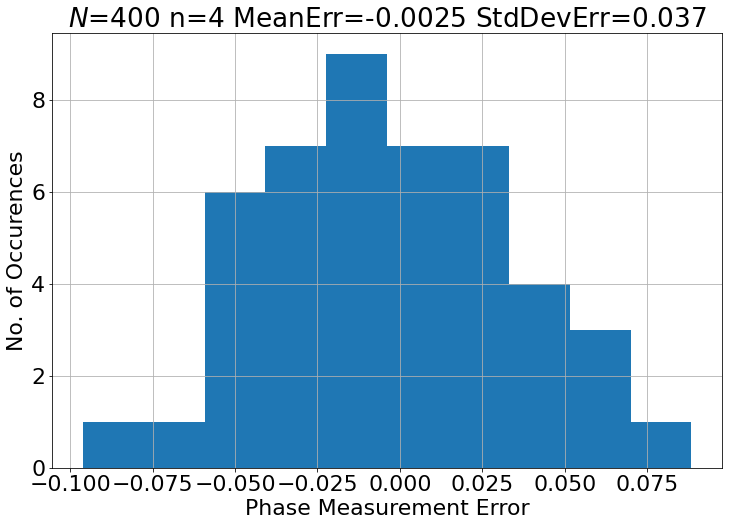

In [52]:
print('All jobs run on ' + deviceName)
device = provider.get_backend(deviceName)

n = 1
job1 = device.retrieve_job('628247c40f68653e2e228304')
phis, parity, phis_calibrate, parity_calib, calib_fit, parity_corrected, phis_est = phase_detection_entangled_experiment_onQC_analyse(num_phi, job1, N, n, device)
phase_detection_entangled_experiment_plot_calib(phis_calibrate, parity_calib, phis, parity, calib_fit, parity_corrected, N, n)
err, meanerr, stddeverr1 = phase_detection_entangled_experiment_plot(phis, parity_corrected, phis_est, N, n)

n = 2
job2 = device.retrieve_job('628247c70f68653b29228305')
phis, parity, phis_calibrate, parity_calib, calib_fit, parity_corrected, phis_est = phase_detection_entangled_experiment_onQC_analyse(num_phi, job2, N, n, device)
phase_detection_entangled_experiment_plot_calib(phis_calibrate, parity_calib, phis, parity, calib_fit, parity_corrected, N, n)
err, meanerr, stddeverr2 = phase_detection_entangled_experiment_plot(phis, parity_corrected, phis_est, N, n)

n = 4
job3 = device.retrieve_job('628247cb07c9cce28fc22844')
phis, parity, phis_calibrate, parity_calib, calib_fit, parity_corrected, phis_est = phase_detection_entangled_experiment_onQC_analyse(num_phi, job3, N, n, device)
phase_detection_entangled_experiment_plot_calib(phis_calibrate, parity_calib, phis, parity, calib_fit, parity_corrected, N, n)
err, meanerr, stddeverr4 = phase_detection_entangled_experiment_plot(phis, parity_corrected, phis_est, N, n)

We'll interpret the data below. Keep in mind that we are running with $N=400$ so we are expecting an ideal error level of $\Delta\phi=0.05$ for $n=1$, $\Delta\phi=0.035$ for $n=2$ and $\Delta\phi=0.025$ for $n=4$. We have added a plot to make sure this is represented accordingly. The blue line repesets the expected quantum enhancement (e.g. the error reduction due to the increase of $n), whereas the blue dots represent the measured values, including the no-quite-perfectly removed systematic errors.

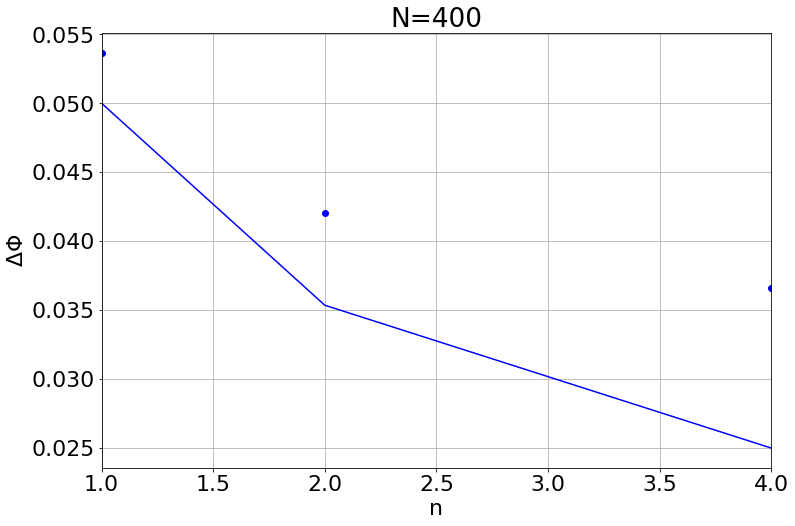

In [53]:
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': 22})
plt.plot([1, 2, 4], [1./np.sqrt(N)/np.sqrt(1),1./np.sqrt(N)/np.sqrt(2),1./np.sqrt(N)/np.sqrt(4)],'b')
plt.title('N=' + str(N))
plt.xlabel('n')
plt.ylabel('$\Delta\Phi$')
plt.xlim(1, 4)
plt.grid(which='major',axis='both')

Here is my quick analysis:
- the experiment works on the quantum computer, we get results, which look reasonably nice
- for all $n$ there is a bit of a systematic error with $\Delta\phi$, which we can mitigate quite nicely with a qudratic error fitting function.
- This is particularily true for $n=2$ where the corrected phase error seems randomly distributed around the zeor value, not so much for $n=4$, where there is a systematic deviation.
- while we do not quite reach the real value for the phase error (the blue line) and it seems like the value taper off a bit there is a real yquantum advantage to be observed, e.g. the overall error drops off for higher $n$. YOU HAVE OBERSVED A QUANTUM ADVANTAGE!

TODO:
- local noise measurement (e.g. running many copies of the script at a fixed $\phi$, instead of using the wonky histogramm analysis, which gets fucked up by systematic errors).
- check for larger $N$